In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import glob
from sklearn.linear_model import LinearRegression

In [2]:
pci_dist = 5
holesize = 50

In [3]:
def readcsv(path):
    DF = pd.read_csv(path, usecols=["Time","Data"])
    DF = DF.dropna()
    DF = DF[:-1]
    DF = DF[(len(DF[DF.Data==0.0]) - 1):]
    DF["Time"] = pd.to_datetime(DF["Time"], format = "%H:%M:%S")
    DF = DF.groupby('Time', group_keys=False, as_index=False).apply(lambda x: x.loc[x.Data.idxmin()])
    DF["time"] = 0.0
    for i in range(len(DF)):
        DF.time[i:(i+1)]=i
    return DF

In [23]:
name = [''] * 10
for i in range(0,10):
    x=str(i+1)
    path = "/root/opt/exp_result/p-{}mm/e-{}mm/{}mm-{}.csv".format(pci_dist, holesize, holesize, x.zfill(2))
    print(path)
    name[i]=readcsv(path)
    print(name[i])

/root/opt/exp_result/p-5mm/e-50mm/50mm-01.csv
                  Time    Data  time
0  1900-01-01 17:08:01     0.0   0.0
1  1900-01-01 17:08:02   482.0   1.0
2  1900-01-01 17:08:03  1744.0   2.0
3  1900-01-01 17:08:04  2544.0   3.0
4  1900-01-01 17:08:05  3663.0   4.0
5  1900-01-01 17:08:06  4346.0   5.0
6  1900-01-01 17:08:07  5239.0   6.0
7  1900-01-01 17:08:08  5745.0   7.0
8  1900-01-01 17:08:09  6360.0   8.0
9  1900-01-01 17:08:10  6662.0   9.0
10 1900-01-01 17:08:11  7010.0  10.0
11 1900-01-01 17:08:12  7274.0  11.0
12 1900-01-01 17:08:13  7415.0  12.0
13 1900-01-01 17:08:14  7593.0  13.0
14 1900-01-01 17:08:15  7689.0  14.0
15 1900-01-01 17:08:16  7806.0  15.0
16 1900-01-01 17:08:17  7879.0  16.0
17 1900-01-01 17:08:18  7974.0  17.0
18 1900-01-01 17:08:19  8027.0  18.0
19 1900-01-01 17:08:20  8096.0  19.0
20 1900-01-01 17:08:21  8140.0  20.0
21 1900-01-01 17:08:22  8200.0  21.0
22 1900-01-01 17:08:23  8234.0  22.0
23 1900-01-01 17:08:24  8276.0  23.0
24 1900-01-01 17:08:25  8316.

/tmp/ipykernel_13/3942349934.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.time[i:(i+1)]=i
/tmp/ipykernel_13/3942349934.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.time[i:(i+1)]=i
/tmp/ipykernel_13/3942349934.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.time[i:(i+1)]=i
/tmp/ipykernel_13/3942349934.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

sim読み込み

In [11]:
path = "/root/opt/sim_result/p-{}mm/{}mm".format(pci_dist, holesize)
filename = "/output"
filetype = ".csv"

dt = 0.1
D = pci_dist / 1000
dns = 2500
volume = dns * np.pi * D*D*D / 6
under = 0.35

csv_files =glob.glob(path+ filename+ "*" + filetype)
#print(csv_files)
print("総ファイル数は" + str(len(csv_files)))

総ファイル数は607


読み込みファイル設定

カラムの頭に空白入ってる

In [12]:
time_amount = pd.DataFrame(columns=["time","quantity", "mass"])#時間と流出個数
for i in range(0,len(csv_files)-2): #wall and seitei
    openfile = path + filename + str(i).zfill(5) +filetype     
    df = pd.read_csv(openfile, usecols=["Pos.x","Pos.y","Pos.z","velocity"])
    df2 = df[df["Pos.y"]<under]#under以下の個数カウント
    add = pd.DataFrame([[i*dt, len(df2), len(df2)*volume]], columns = ["time","quantity","mass"])
    time_amount = time_amount.append(add)
    #print(openfile)
    
del(df)
del(df2)
del(add)

ファイル順番に読み込んで処理

In [13]:
print(time_amount)

    time quantity      mass
0    0.0        0  0.000000
0    0.1      425  0.069540
0    0.2     1144  0.187187
0    0.3     1919  0.313996
0    0.4     2704  0.442441
..   ...      ...       ...
0   60.0    60698  9.931687
0   60.1    60698  9.931687
0   60.2    60698  9.931687
0   60.3    60698  9.931687
0   60.4    60698  9.931687

[605 rows x 3 columns]


In [14]:
time_amount = time_amount[time_amount.time<=15]

plot

In [24]:
import matplotlib.cm as cm
def Plot(data,n,Fig):
    N=str(n)
    data = data[data.time<=15]
    X = data["time"]
    Y = data["Data"]
    Fig.plot(X,Y, 's', ms=8, color="green", label='experiment')

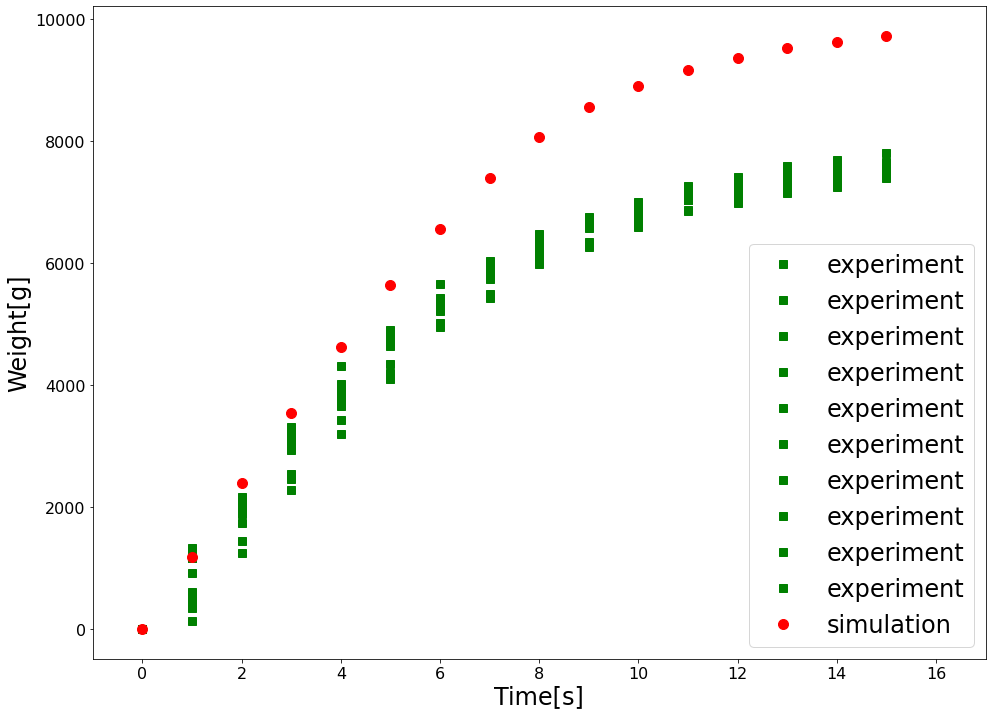

In [25]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
#ax.set_title("Hole-{}mm".format(holesize),fontsize=24)
ax.set_xlabel("Time[s]",fontsize=24)
ax.set_ylabel("Weight[g]",fontsize=24)
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)

ax.set_xlim(-1,17)

for i in range(0,10):
    Plot(name[i],i+1,ax)

sim_plot = time_amount[0::10]
xp = sim_plot["time"]
yp = sim_plot["mass"]
ax.plot(xp,yp*1000, 'o', ms=10, color='red', label='simulation')

ax.legend(loc='lower right', fontsize=24)

plt.show()

In [17]:
#fig.savefig("/root/opt/plot/p-{}mm_{}mm.png".format(pci_dist, holesize))

In [ ]:
import matplotlib.cm as cm
def Plot(data,n,Fig):
    N=str(n)
    data = data[data.time<=15]
    X = data["time"]
    Y = data["Data"]
    Fig.plot(X,Y, 's', ms=8, color=cm.winter(n/10), label='experiment-{b}'.format(b=N.zfill(2)))

In [ ]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
#ax.set_title("Hole-{}mm".format(holesize),fontsize=24)
ax.set_xlabel("Time[s]",fontsize=24)
ax.set_ylabel("Weight[g]",fontsize=24)
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)

ax.set_xlim(-1,17)

for i in range(0,10):
    Plot(name[i],i+1,ax)

sim_plot = time_amount[0::10]
xp = sim_plot["time"]
yp = sim_plot["mass"]
ax.plot(xp,yp*1000, 'o', ms=10, color='red', label='simulation')

ax.legend(loc='lower right', fontsize=24)

plt.show()